### 1. Introduction and Objective

The dataset used is the energy dataset which tells us about the different values of heating and cooling load based on different parameters i.e Relative Compactness, Surface area, Wall area and Roof area etc. The energy dataset contains 10 columns/features and 768 rows.

The main objective is to apply different regression models such as Linear, Lasso, Ridge and ElasticNet to make prediction about the future outcome values. After proper analysis and evaluation of different model we will select the best model which can be used to predecit the values. For Evaluation, we will use RMSE(Root mean square error, MAE(mean absolute error) and R2score to select the best preformance model.

With the choosen datset, our goal is to predict the best possible model which can be used to predict the future outcomes of heating load based on other features. Identify relationship between heating load and cooling load based on other parameters.


**Data Source** - https://www.kaggle.com/datasets/ahmettezcantekin/beginner-datasets/data

### 2. Data Collection and Preprocessing

In [1]:
# Import libraries for EDA
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")   #ignore warnings

In [2]:
# Import data

df = pd.read_csv('energy.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.shape

(768, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [6]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
print('Original Dataset ;')
df.head()

Original Dataset ;


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
df = df.drop(['Overall Height','Orientation','Glazing Area','Glazing Area Distribution'], axis = 1)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,15.55,21.33
1,0.98,514.5,294.0,110.25,15.55,21.33
2,0.98,514.5,294.0,110.25,15.55,21.33
3,0.98,514.5,294.0,110.25,15.55,21.33
4,0.90,563.5,318.5,122.50,20.84,28.28


In [9]:
#check if there are missing values
df.isnull().sum()

Relative Compactness    0
Surface Area            0
Wall Area               0
Roof Area               0
Heating Load            0
Cooling Load            0
dtype: int64

In [10]:
#check if there are any duplicate values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (12, 6)


In [11]:
#Removing duplicate values
data = df.drop_duplicates()

In [12]:
#Check if duplicate values are removed or not
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


## 3. Data Exploration and Visualization

<Axes: xlabel='Heating Load', ylabel='Cooling Load'>

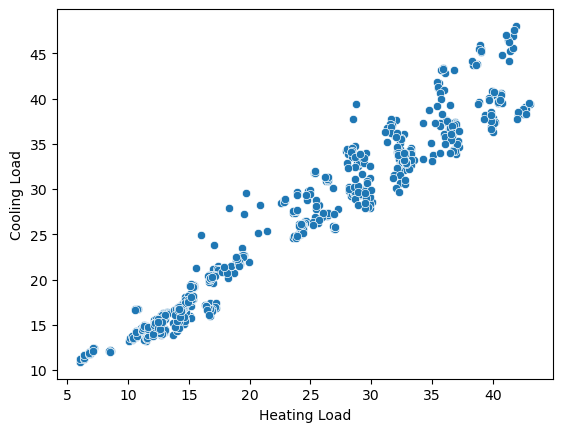

In [13]:
sns.scatterplot(data=data, x='Heating Load', y='Cooling Load')

<Axes: xlabel='Relative Compactness', ylabel='Surface Area'>

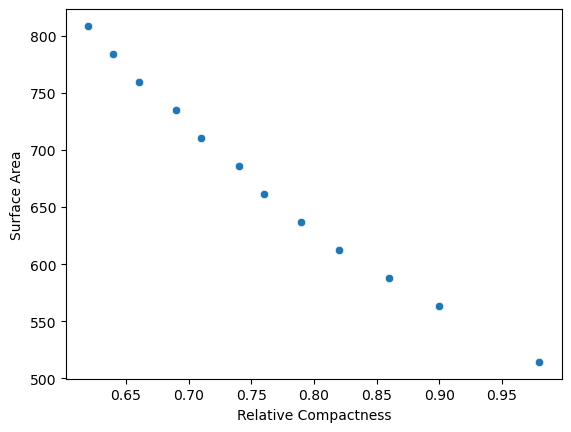

In [14]:
sns.scatterplot(data=data, x='Relative Compactness', y='Surface Area')

<Axes: xlabel='Relative Compactness'>

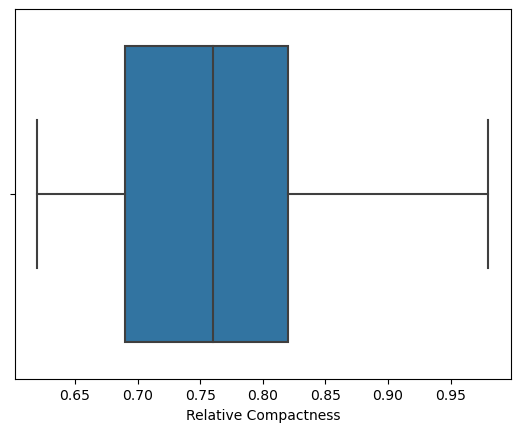

In [15]:
# check if quantitative variables have outliers.

sns.boxplot(x=data["Relative Compactness"])

<Axes: xlabel='Surface Area'>

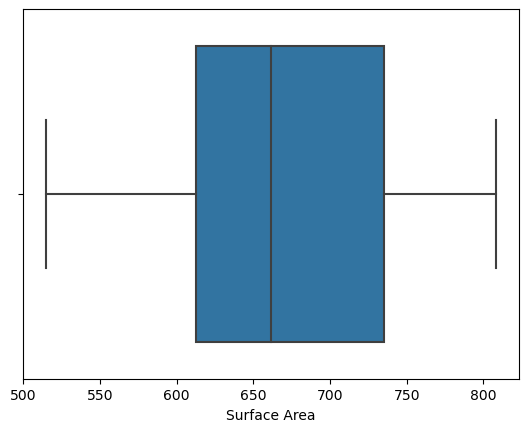

In [16]:
# check if quantitative variables have outliers.

sns.boxplot(x=data["Surface Area"])

<Axes: xlabel='Wall Area'>

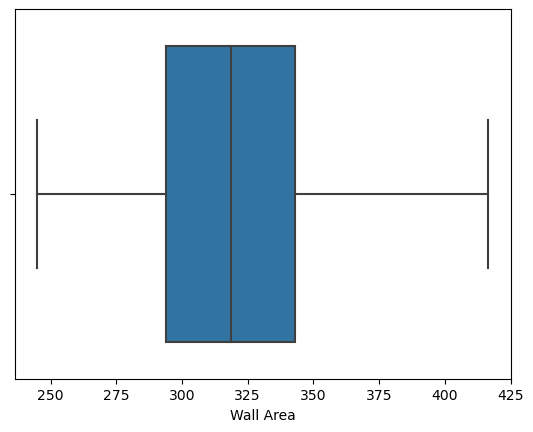

In [17]:
# check if quantitative variables have outliers.

sns.boxplot(x=data["Wall Area"])

<Axes: xlabel='Roof Area'>

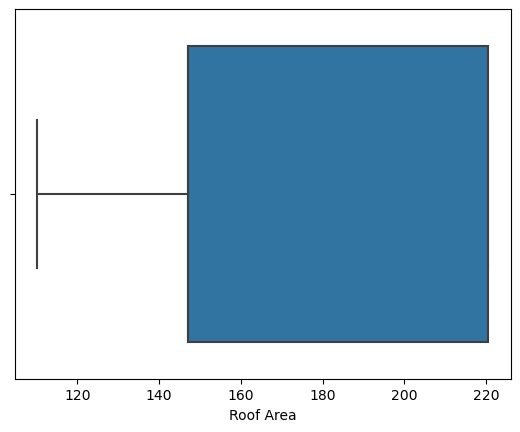

In [18]:
sns.boxplot(x=data["Roof Area"])

<Axes: xlabel='Heating Load'>

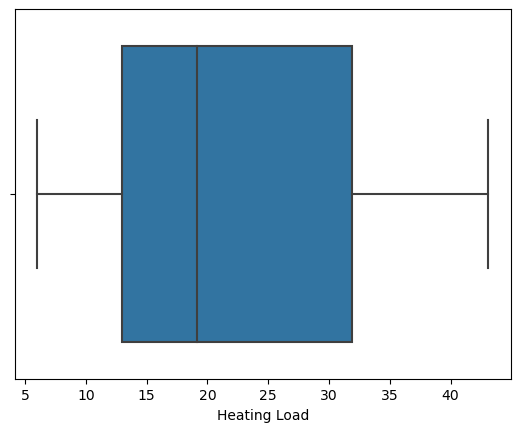

In [19]:
sns.boxplot(x=data["Heating Load"])

<Axes: xlabel='Cooling Load'>

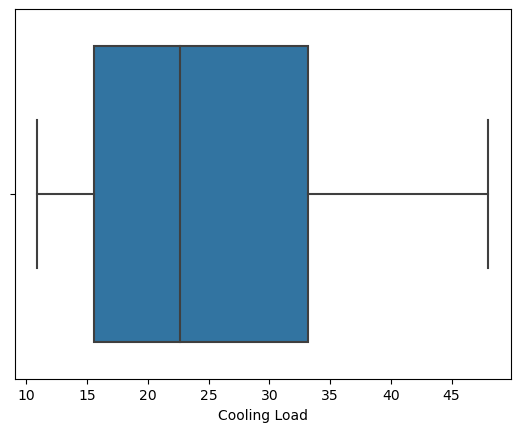

In [20]:
sns.boxplot(x=data["Cooling Load"])

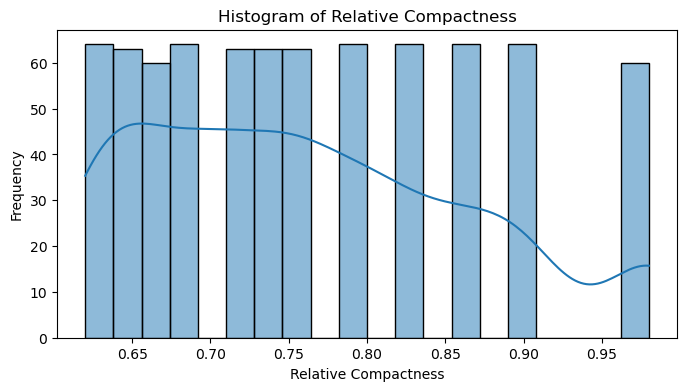

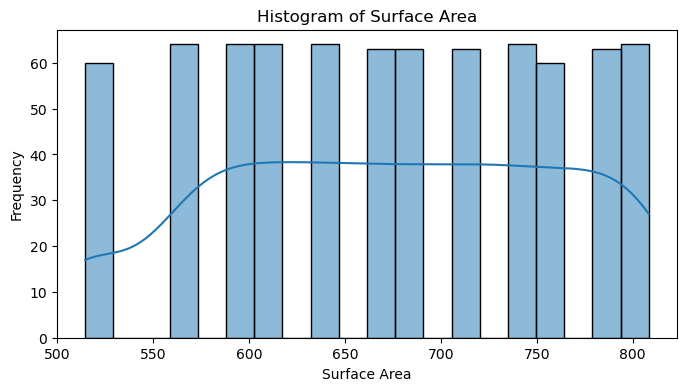

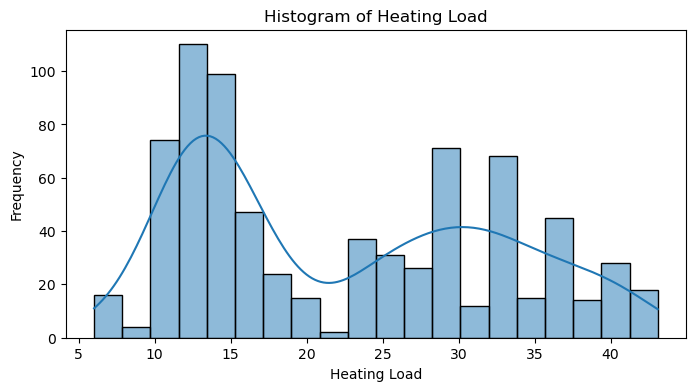

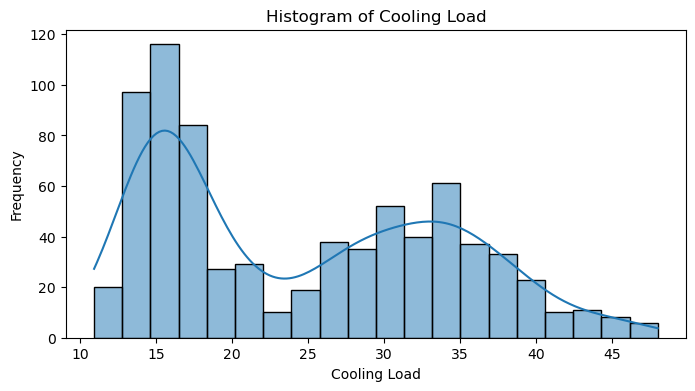

In [21]:
#Creating a histogram of a numerical variable
plt.figure(figsize=(8, 4))
sns.histplot(data['Relative Compactness'], bins=20, kde=True)
plt.xlabel('Relative Compactness')
plt.ylabel('Frequency')
plt.title('Histogram of Relative Compactness')
plt.show()

#Creating a histogram of a numerical variable
plt.figure(figsize=(8, 4))
sns.histplot(data['Surface Area'], bins=20, kde=True)
plt.xlabel('Surface Area')
plt.ylabel('Frequency')
plt.title('Histogram of Surface Area')
plt.show()

#Creating a histogram of a numerical variable
plt.figure(figsize=(8, 4))
sns.histplot(data['Heating Load'], bins=20, kde=True)
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.title('Histogram of Heating Load')
plt.show()

#Creating a histogram of a numerical variable
plt.figure(figsize=(8, 4))
sns.histplot(data['Cooling Load'], bins=20, kde=True)
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')
plt.title('Histogram of Cooling Load')
plt.show()

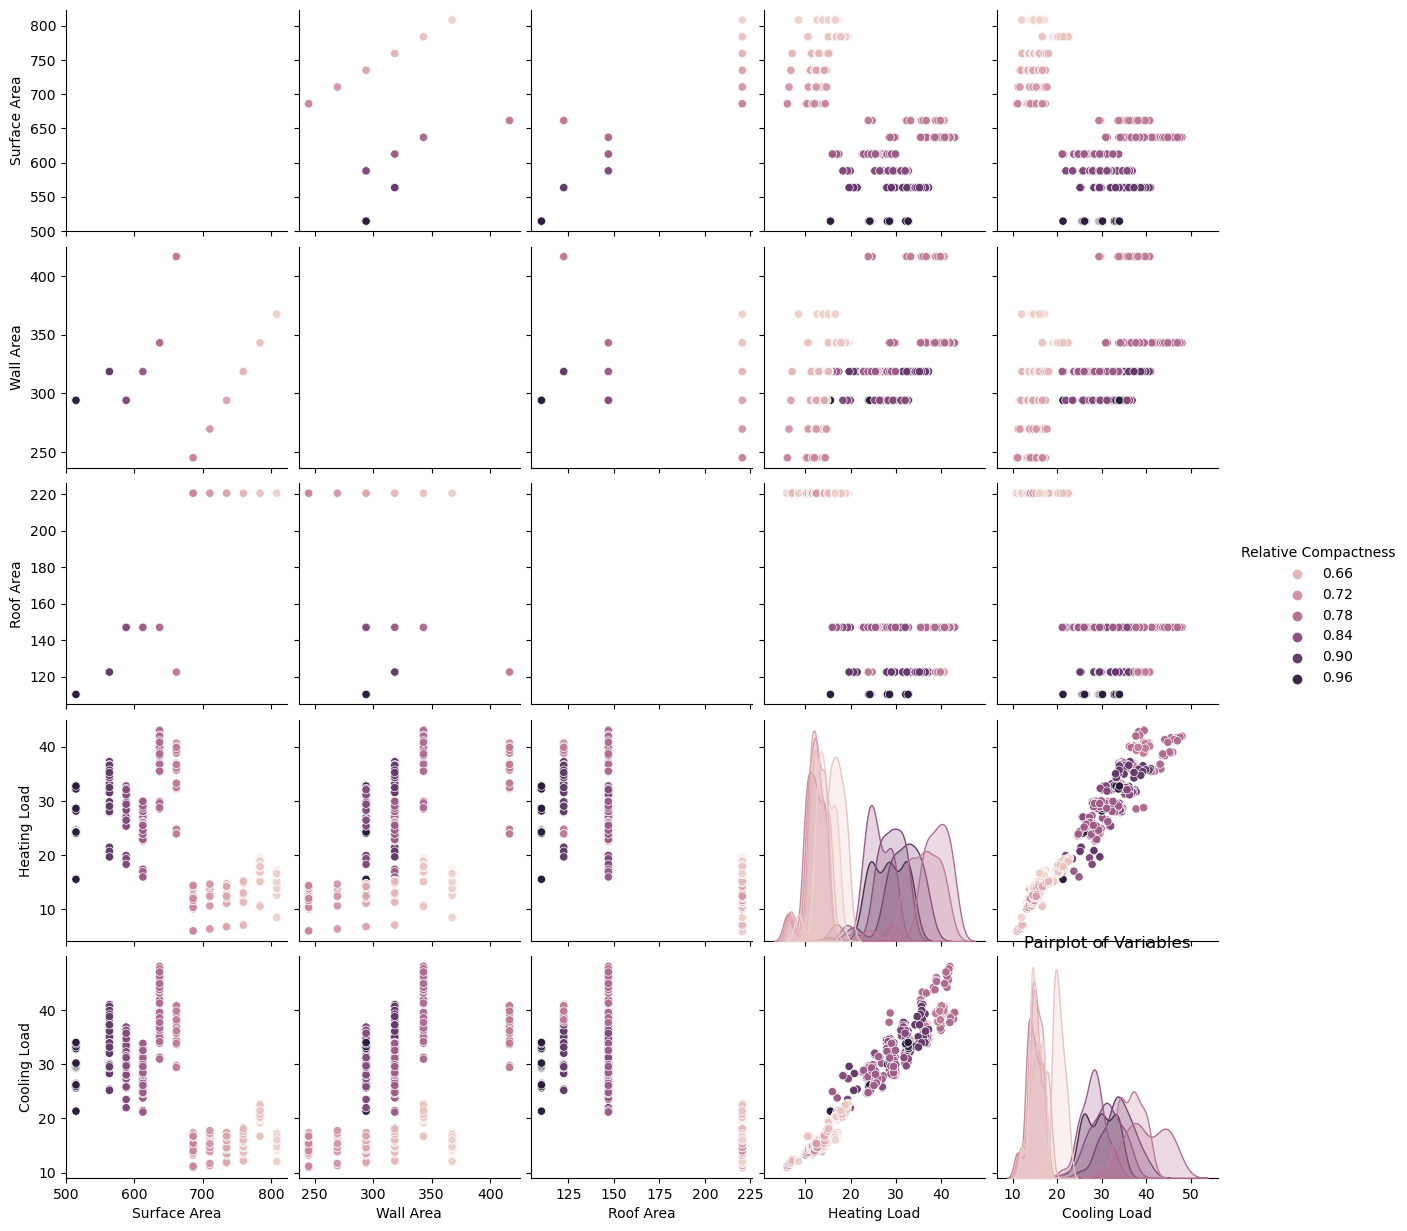

In [22]:
#Pair plot for the given dataset.
sns.pairplot(data, hue= "Relative Compactness")
plt.title('Pairplot of Variables')
plt.show()

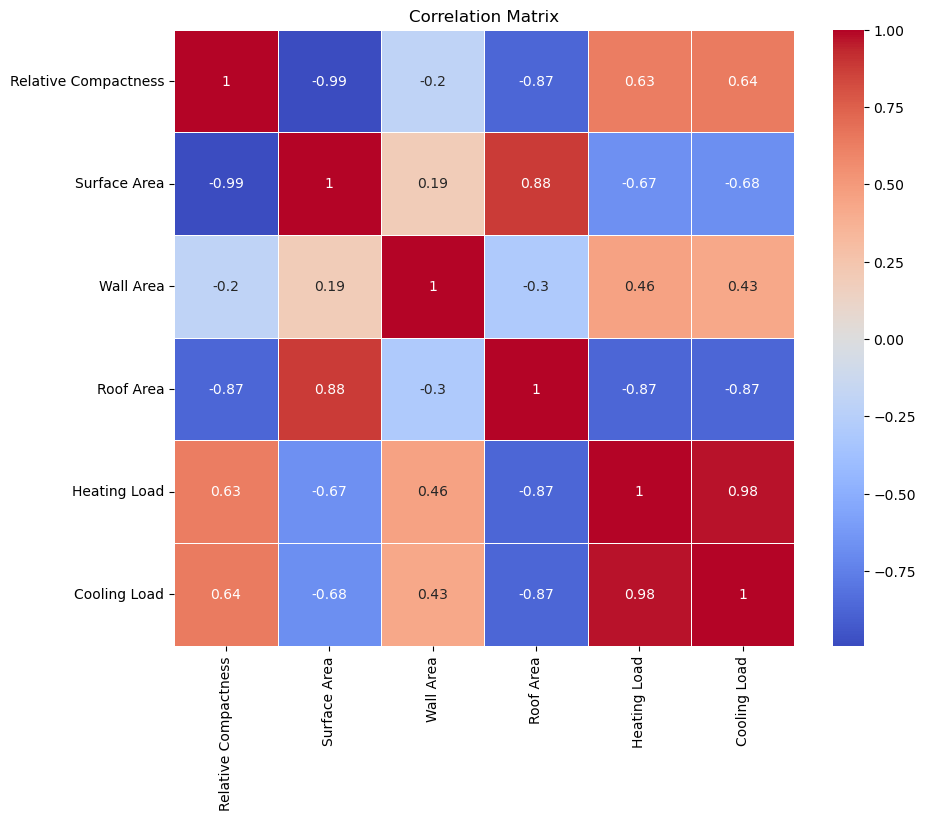

In [23]:
corr_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 4. Model Training

#### Regression using two features (Basic Regression)

In [24]:
from sklearn.linear_model import LinearRegression

CL = data['Cooling Load'].values
y = data['Heating Load'].values

In [25]:
X = CL.reshape(-1,1)

X.shape

(756, 1)

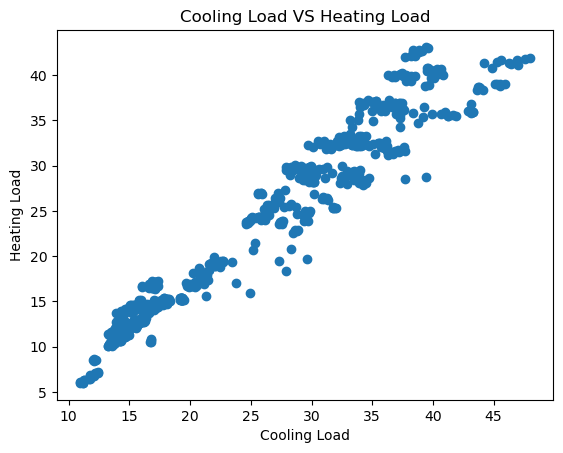

In [26]:
plt.scatter(X,y)
plt.xlabel("Cooling Load")
plt.ylabel("Heating Load")
plt.title("Cooling Load VS Heating Load")
plt.show()

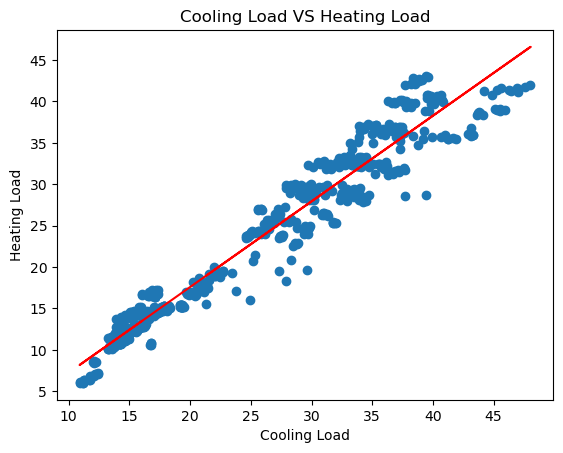

In [27]:
#Selection of regression model
reg = LinearRegression()

#Fitting model on train data
model = reg.fit(X,y)

#Make prediction on test data
y_pred = reg.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred, color="Red")
plt.xlabel("Cooling Load")
plt.ylabel("Heating Load")
plt.title("Cooling Load VS Heating Load")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

def calculate_mse(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    return mse


mse = calculate_mse(model, X, y)
print("Mean Squared Error: ", mse)

Mean Squared Error:  4.862588329532082


In [29]:
r_sq = model.score(X,y)
print('Coefficient of Determination (R^2 score):', r_sq)

Coefficient of Determination (R^2 score): 0.952477663306401


#### Regression using multiple features

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selection of independent and dependent variable
X = data.drop(['Heating Load'] , axis=1).values        
y = data['Heating Load'].values

In [31]:
# Splitting the data into training set and test set with a 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear

In [32]:
#Selection of regression model
reg = LinearRegression()

#Fitting model on train data
reg.fit(X_train,y_train)

LinearRegression()

In [33]:
#Make prediction on test data
y_pred = reg.predict(X_test)

### Lasso

In [34]:
#Selection of regression model
lasso = Lasso(alpha=0.1)

#Fitting model on train data
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [35]:
#Make prediction on test data
lasso_pred = lasso.predict(X_test)

### Ridge

In [36]:
#Selection of regression model
ridge = Ridge(alpha=0.1)

#Fitting model on train data
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [37]:
#Make prediction on test data
ridge_pred = ridge.predict(X_test)

### ElasticNet

In [38]:
#Selection of regression model
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.5)

#Fitting model on train data
elasticnet_model.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [39]:
#Make prediction on test data
elasticnet_pred = elasticnet_model.predict(X_test)

### 5. Model Evaluation

In [40]:
# Calculate MAE(Mean Absolute Error)
Linearmae = mean_absolute_error(y_test,y_pred)
print(f"Linear MAE : {Linearmae}")

Lassomae = mean_absolute_error(y_test,lasso_pred)
print(f"Lasso MAE : {Lassomae}")

Ridgemae = mean_absolute_error(y_test,ridge_pred)
print(f"Ridge MAE : {Ridgemae}")

ElasticNetmae = mean_absolute_error(y_test,elasticnet_pred)
print(f"ElasticNet MAE : {ElasticNetmae}")

Linear MAE : 1.4829820930637854
Lasso MAE : 1.4809204647279615
Ridge MAE : 1.4832728249590637
ElasticNet MAE : 1.4837090500130845


In [41]:
# Calculate MSE(Mean Squared Error)
Linearmse = mean_squared_error(y_test,y_pred)
print(f"Linear MSE : {Linearmse}")

Lassomse = mean_squared_error(y_test,lasso_pred)
print(f"Lasso MSE : {Lassomse}")

Ridgemse = mean_squared_error(y_test,ridge_pred)
print(f"Ridge MSE : {Ridgemse}")

ElasticNetmse = mean_squared_error(y_test,elasticnet_pred)
print(f"ElasticNet MSE : {ElasticNetmse}")


Linear MSE : 4.101152956246266
Lasso MSE : 4.093236779010868
Ridge MSE : 4.102757408963702
ElasticNet MSE : 4.103848958738939


In [42]:
# Calculate RMSE(Root Mean Square Error)
Linearrmse = Linearmse**0.5
print(f"Linear RMSE : {Linearrmse}")

Lassormse = Lassomse**0.5
print(f"Lasso RMSE : {Lassormse}")

Ridgermse = Ridgemse**0.5
print(f"Ridge RMSE : {Ridgermse}")

ElasticNetrmse = ElasticNetmse**0.5
print(f"ElasticNet RMSE : {ElasticNetrmse}")


Linear RMSE : 2.0251303553712945
Lasso RMSE : 2.0231749254601956
Ridge RMSE : 2.0255264522991796
ElasticNet RMSE : 2.025795882792474


In [43]:
# Calculate R^2 Score 
Linearr2score=r2_score(y_test,y_pred)
print(f"Linear R^2 Score: {Linearr2score}")

Lassor2score=r2_score(y_test,lasso_pred)
print(f"Lasso R^2 Score: {Lassor2score}")

Ridger2score=r2_score(y_test,ridge_pred)
print(f"Ridge R^2 Score: {Ridger2score}")

Elasticnetr2score=r2_score(y_test,elasticnet_pred)
print(f"ElasticNet R^2 Score: {Elasticnetr2score}")


Linear R^2 Score: 0.9596194889309001
Lasso R^2 Score: 0.9596974326910791
Ridge R^2 Score: 0.9596036912707281
ElasticNet R^2 Score: 0.959592943722843


### 6. Model Comparision and Selection

In [44]:
#Values for Lasso Regression model
print('Based on comparision values for best fit model')

Lassomae = mean_absolute_error(y_test,lasso_pred)
print(f"Lasso MAE : {Lassomae}")

Lassomse = mean_squared_error(y_test,lasso_pred)
print(f"Lasso MSE : {Lassomse}")

Lassormse = Lassomse**0.5
print(f"Lasso RMSE : {Lassormse}")

Lassor2score=r2_score(y_test,lasso_pred)
print(f"Lasso R^2 Score: {Lassor2score}")

Based on comparision values for best fit model
Lasso MAE : 1.4809204647279615
Lasso MSE : 4.093236779010868
Lasso RMSE : 2.0231749254601956
Lasso R^2 Score: 0.9596974326910791


After analysis and training of different models i.e. Linear, Lasso, Ridge and ElasticNet we did evaluation of models based on four parameters i.e. MAE, MSE, RMSE and R2 score, the model with **minimum error values and R^2 value close to 1** will be the **best fit** model. We found that all the given models are performing well with the choosen datset. There is a minute difference between the performance of each model. 

Based on the minimum error values and R^2 values close to 1, we selected **LASSO Regression model as the best model on the basis of above observations.**


### 7. Conclusion and Future Improvement

**Conclusion and Insights**

- From the above analysis we can tell that all the models are performing well with the dataset but Lasso regression model is slightly better than the other models.<br>
- Relative Compactness and Surface area are inversely proprtional to each other i.e. For lower surface area, relative compactness values is more and vice versa.<br>
- From the scatter plot, we can say Cooling Load and Heating load are linearly proportional to each other as the cooling load increases heating load also increases.<br>
- R^2 score values mostly lies between 0 and 1. More the value closer to 1, the better is the performance of models.<br>
- Usually, low error values are well suited for best fit models.


**Future Scope**<br>

- We can perform tuning of hyperparameters for better results.<br>
- Implementation of Cross validation to further increase the performance model.<br>
- Explore more advanced model selection techniques and regression models.<br>
- Use of advanced techniques for feature selection and it's implementations.<br>
- We can use ensemble methods like bagging and boosting to further improve the accuracy of the model.


### 8. References

1. Regression analysis class notes
2. Different python libraries - Numpy, Pandas, Sklearn, seaborn, Matplotlib and regression models.